In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column132,Column133,Column134,Column135,Column136,Column137,Column138,Column139,Column140,Column141
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [6]:
pip install tensorflow

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Conv1D, Dense, Flatten, Concatenate, Dropout

# Load the dataset
file_path = 'train.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract features and labels
features = data.iloc[:, :-1].values  # Columns 1–140
labels = data.iloc[:, -1].values    # Column 141

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# One-hot encode the labels for multi-class classification
encoder = OneHotEncoder()
labels_encoded = encoder.fit_transform(labels.reshape(-1, 1)).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels_encoded, test_size=0.2, random_state=42, stratify=labels
)

# Reshape features for input to RNN (samples, timesteps, features)
n_timesteps = features_normalized.shape[1]
X_train_rnn = X_train.reshape(X_train.shape[0], n_timesteps, 1)
X_test_rnn = X_test.reshape(X_test.shape[0], n_timesteps, 1)

# Define the RNN-FCN model
input_layer = Input(shape=(n_timesteps, 1))

# RNN branch
rnn_layer = LSTM(64, return_sequences=True)(input_layer)
rnn_layer = LSTM(64)(rnn_layer)

# FCN branch
conv_layer = Conv1D(filters=128, kernel_size=8, activation='relu')(input_layer)
conv_layer = Conv1D(filters=256, kernel_size=5, activation='relu')(conv_layer)
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = Flatten()(conv_layer)

# Concatenate RNN and FCN outputs
merged = Concatenate()([rnn_layer, conv_layer])
merged = Dropout(0.5)(merged)
output_layer = Dense(y_train.shape[1], activation='softmax')(merged)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_rnn, y_train,
    validation_data=(X_test_rnn, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('rnn_fcn_heart_anomaly_modael.h5')


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 494ms/step - accuracy: 0.7513 - loss: 0.9490 - val_accuracy: 0.9400 - val_loss: 0.3588
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.9395 - loss: 0.3214 - val_accuracy: 0.9300 - val_loss: 0.1781
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.9355 - loss: 0.2509 - val_accuracy: 0.9500 - val_loss: 0.1792
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 431ms/step - accuracy: 0.9359 - loss: 0.1900 - val_accuracy: 0.9500 - val_loss: 0.1744
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.9557 - loss: 0.1312 - val_accuracy: 0.9500 - val_loss: 0.1654
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 425ms/step - accuracy: 0.9727 - loss: 0.0983 - val_accuracy: 0.9500 - val_loss: 0.1848
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.9670 - loss: 0.0948 - val_accuracy: 0.9500 - val_loss: 0.1793
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.9626 - loss: 0.1028 - val_accuracy: 0

Test Accuracy: 92.00%


In [8]:
features_normalized.shape[0]

500

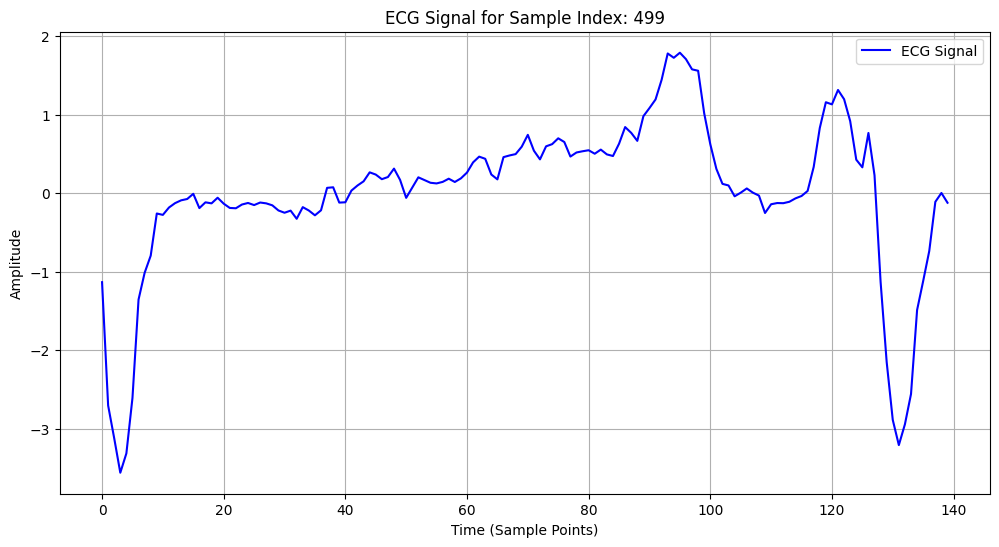

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Predicted Class for Sample Index 499: 4


In [9]:
import matplotlib.pyplot as plt

# Assume the first 140 columns represent ECG features (time-series data)
sample_index = 499  # Change this to visualize different samples

# Extract the ECG signal for a sample
ecg_signal = features[sample_index, :]

# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(range(len(ecg_signal)), ecg_signal, label="ECG Signal", color="blue")
plt.title("ECG Signal for Sample Index: {}".format(sample_index))
plt.xlabel("Time (Sample Points)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Predict the class for the selected sample using the trained model
sample = features_normalized[sample_index].reshape(1, n_timesteps, 1)
predicted_class = model.predict(sample).argmax()

print(f"Predicted Class for Sample Index {sample_index}: {predicted_class}")


In [13]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Fit scaler on training data
scaler = StandardScaler()
scaler.fit(data)  # `train_data` is your training dataset

# Save the scaler to a file
dump(scaler, "scaler_filename.joblib")


['scaler_filename.joblib']

In [18]:
import streamlit as st

In [19]:
manual_input = st.text_area("Or enter comma-separated ECG values:")

2024-11-28 02:37:51.735 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:37:51.738 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:37:51.740 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:37:51.742 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:37:51.745 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-28 02:37:51.747 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [20]:
data = pd.read_csv('train.csv', header=None)
ecg_values = data.iloc[0, :].values.reshape(1, -1)  # Take the first row as an example
try:
    ecg_values = np.array([float(x) for x in manual_input.split(",")]).reshape(1, -1)
except ValueError:
    st.error("Invalid ECG values. Please enter numeric, comma-separated values.")
    ecg_values = None


2024-11-28 02:37:57.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:37:57.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [22]:
from joblib import load

# Load the pre-saved scaler
scaler = load("scaler_filename.joblib")  # Replace "scaler_filename.joblib" with your actual file path

# Normalize the ECG values using the loaded scaler
if ecg_values is not None:
    ecg_data_normalized = scaler.transform(ecg_values)

In [25]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from joblib import load  # Ensure you save the scaler using joblib during training

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow warnings

# Load trained model
model = load_model('/content/rnn_fcn_heart_anomaly_modael.h5')
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Load pre-fitted scaler (replace 'scaler_filename.joblib' with your actual scaler filename)
scaler = load("scaler_filename.joblib")  # Pre-saved scaler used during model training

# Function to classify ECG data
def classify_ecg(ecg_data, model, scaler):
    # Normalize the data using the pre-fitted scaler
    ecg_data_normalized = scaler.transform(ecg_data)
    # Reshape for RNN input (samples, time steps, features)
    ecg_data_reshaped = ecg_data_normalized.reshape(1, ecg_data_normalized.shape[1], 1)
    # Predict class probabilities
    prediction = model.predict(ecg_data_reshaped)
    predicted_class = np.argmax(prediction)  # Get class with highest probability
    confidence = prediction[0][predicted_class]  # Confidence for predicted class
    return predicted_class, confidence

# Streamlit app starts here
st.title("ECG Classification Application")
st.write("Upload ECG data or manually enter the values below to visualize and classify.")

# Upload CSV file
uploaded_file = st.file_uploader("Upload your ECG data file (CSV format)", type=["csv"])

# Input ECG data manually
manual_input = st.text_area("Or enter comma-separated ECG values:")

# Process input
if uploaded_file:
    # Load ECG data from the uploaded file
    data = pd.read_csv(uploaded_file, header=None)
    ecg_values = data.iloc[0, :].values.reshape(1, -1)  # Take the first row as an example
elif manual_input:
    # Process manually entered input
    try:
        ecg_values = np.array([float(x) for x in manual_input.split(",")]).reshape(1, -1)
    except ValueError:
        st.error("Invalid ECG values. Please enter numeric, comma-separated values.")
        ecg_values = None
else:
    ecg_values = None

if ecg_values is not None:
    # Visualize ECG data
    st.write("ECG Waveform")
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(range(len(ecg_values[0])), ecg_values[0])
    ax.set_title("ECG Signal")
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    st.pyplot(fig)

    # Classify the ECG data
    predicted_class, confidence = classify_ecg(ecg_values, model, scaler)
    st.write(f"**Predicted Class**: {predicted_class}")
    st.write(f"**Confidence**: {confidence * 100:.2f}%")

    # Additional information about classification
    if predicted_class == 0:
        st.success("The ECG is classified as **Normal**.")
    elif predicted_class == 1:
        st.warning("The ECG indicates a **possible anomaly**. Please consult a specialist.")
    else:
        st.error("The ECG indicates a **severe anomaly**. Immediate medical attention is advised.")
else:
    st.info("Please upload an ECG file or enter values manually to proceed.")


2024-11-28 02:56:25.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 02:56:25.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar